Australian Political Party Donations
===

__Overview__

A number of inidividuals and organisations have made numerous donations to political parties in Australia. This sheet doesn't seek to find the motive behind these donations but it does seek to summarise *who* is donating to which parties.

__Source of Data__

All the data in this Notebook comes from the Australian Electoral Commission Website. You can do your own research by looking [here](http://periodicdisclosures.aec.gov.au/).

__Summary of Findings__

In [156]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib inline

__Data Loading__

Load data from the csvs downloaded off the AEC website.

In [147]:
labor = pd.read_csv('data/labor-2014-2015.csv')
liberal = pd.read_csv('data/liberal-2014-2015.csv')
national = pd.read_csv('data/national-2014-2015.csv')
green = pd.read_csv('data/green-2014-2015.csv')
donations = {
    'Labor' : labor,
    'Liberal' : liberal,
    'Nationals' : national,
    'Greens' : green
}

__Donation Totals__

Total value of donations over the reportable ($12,800) threadhold in 2014-2015

Greens: $220,116
Liberal: $7,893,118
Nationals: $680,413
Labor: $4,174,712


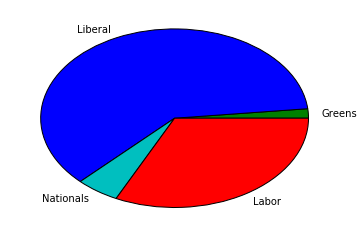

In [285]:
print('Total value of donations over the reportable ($12,800) threadhold in 2014-2015')
print('')
totals = []
for party, dons in donations.items():
    total = int(dons['AmountPaid'].sum())
    print('{:s}: ${:,d}'.format(party, total))
    totals.append(total)
    
ax = plt.pie(totals, labels=list(donations.keys()), colors=('g', 'b', 'c', 'r'))

__Distribution of Donation Sizes__

This helps us get an idea about the size of donations to each party. In 2014-2015 the Liberal party had the largest donation ($600K). It also had the largest number of donations.

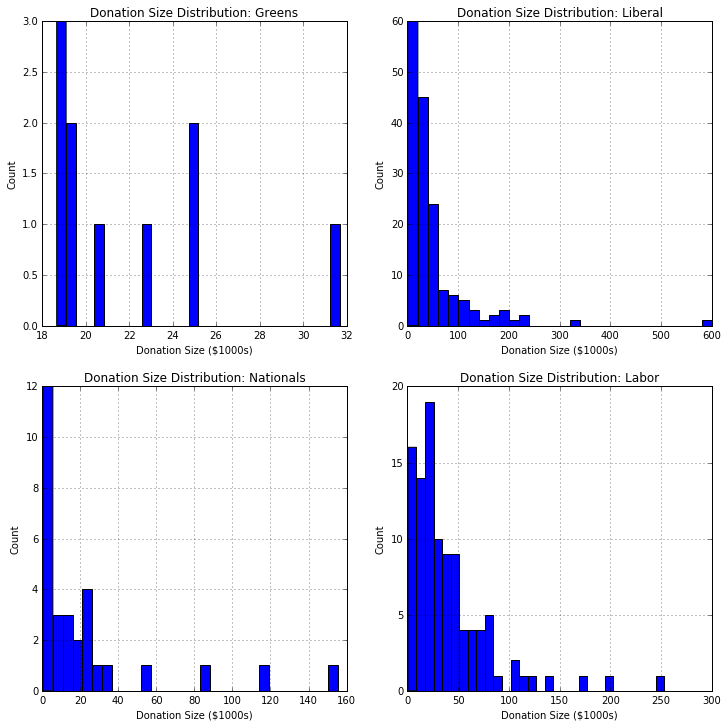

In [271]:
f, axarr = plt.subplots(2, 2)
i = 0
for party, dons in donations.items():
    ax = axarr[int(i / 2), i % 2]
    ax = (dons.groupby('DonorClientNm').sum()['AmountPaid'] / 1000).hist(bins=30, ax = ax)
    ax.set_xlabel('Donation Size ($1000s)')
    ax.set_ylabel('Count')
    ax.set_title('Donation Size Distribution: %s' % party)
    i += 1
fig = plt.gcf().set_size_inches(12, 12)    

__Cumulative Distributions of Donations__

This also helps us understand the size of donations that each party recieved. We additionally add some lines to these charts to help show what 50% of the donations represents, and how many donors make up 50% of the total value of donations.

It's also worth noting that the more *curved* this chart is, the more *unequal* the size of the donations are. If everyone donated the same amount we would expect the green line to be half way along the chart and for the blue line to be a straight line. What this shows is that for some political parties a reasonably small percentage of donors account for 50% of the total value of donations. Further down this sheet, we'll dig into who these donors are.

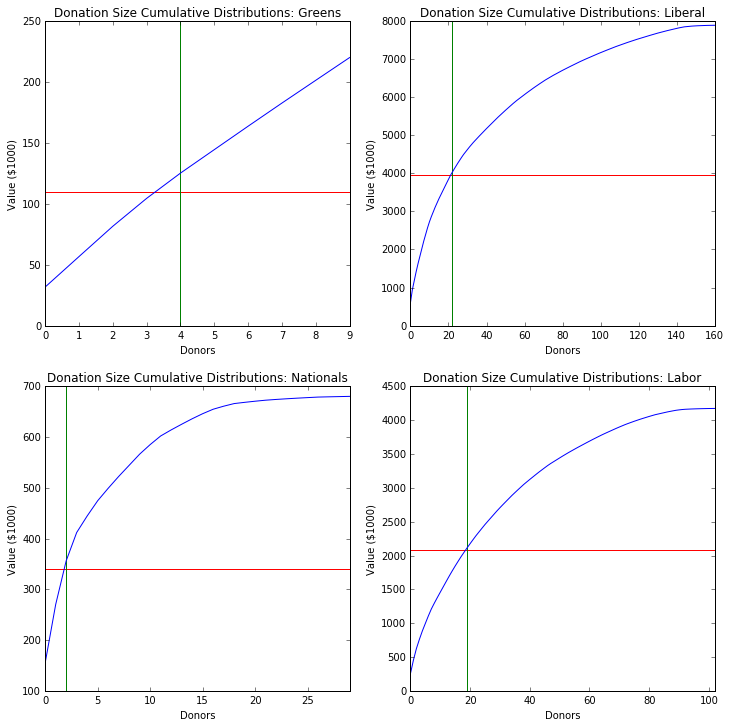

In [270]:
f, axarr = plt.subplots(2, 2)
i = 0
for party, dons in donations.items():
    ax = axarr[int(i / 2), i % 2]
    sums = dons.groupby('DonorClientNm').sum()['AmountPaid']
    sums = sums.sort_values(ascending=False) / 1000
    sums.index = range(len(sums))
    cumsums = sums.cumsum()
    total = sums.sum()
    half = total / 2
    half_idx = cumsums[cumsums < half].index[-1]
    ax.axhline(half, color='r')
    ax.axvline(half_idx + 1, color='g')
    cumsums.plot(ax=ax)
    ax.set_title('Donation Size Cumulative Distributions: %s' % party)
    ax.set_xlabel('Donors')
    ax.set_ylabel('Value ($1000)')
    i += 1
fig = plt.gcf().set_size_inches(12, 12) 

__Big Donors__

__Dual Donors__

Its also interesting to see that some donors make donations to multiple political parties. Here's a breakdown of some of those donors and who they donated to.